# <p style="text-align: center;">EE 379K: Data Science Lab</p>
# <p style="text-align: center;">Lab 4 - 10/2/17</p>
## <p style="text-align: center;">Rachel Chen and Kevin Yee</p>
### <p style="text-align: center;"> rjc2737 and kjy252</p>

![](http://i.markdownnotes.com/image_MDsvrJO.png)

## Answers

## 1.1 Create 3D Plot

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
%matplotlib inline

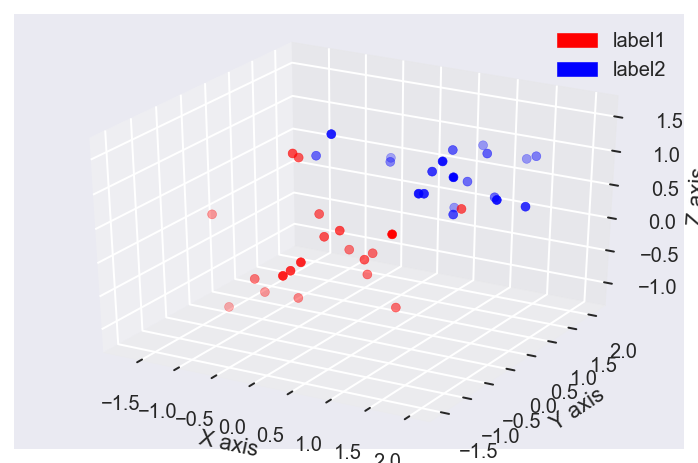

In [108]:

u1 = [0, 0, 0]
covMatrix1 = [[0.5, 0, 0], [0, 0.5, 0], [0, 0, 0.7]]

u2 = [1, 1, 1]
covMatrix2 = [[0.5, 0, 0], [0, 0.5, 0], [0, 0, 0.1]]

#generate 20 random points from a Gaussian multivariate distribution
x1, y1, z1 = np.random.multivariate_normal(u1, covMatrix1, 20).T
x2, y2, z2 = np.random.multivariate_normal(u2, covMatrix2, 20).T

matrix1 = np.column_stack((x1,y1,z1))
matrix2 = np.column_stack((x2,y2,z2))

#plot the 3D plot of the clouds of data points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, y1, z1, c='r', marker='o')
ax.scatter(x2, y2, z2, c='b', marker='o')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

red_patch = mpatches.Patch(color='red', label='label1')
blue_patch = mpatches.Patch(color='blue', label='label2')
plt.legend(handles=[red_patch, blue_patch])

plt.show()

## 1.2 Observation of 3D Space

We can see that label 2 is offset to the right of label 1. This makes sense since label 2 is centered at a mean, right of label 1. However, the two distributions are hard to distinguish between with some overlap in the middle.

In [109]:
#concatenate all the points
x = np.append(x1,x2)
y = np.append(y1,y2)
z = np.append(z1,z2)

matrix = np.column_stack((x,y,z))

In [110]:
#concatenate all the points
x = np.append(x1,x2)
y = np.append(y1,y2)
z = np.append(z1,z2)

matrix = np.column_stack((x,y,z))

#find the covariance matrix:
mean = np.mean(matrix, axis=0)

#find the variances
varX = np.sum(np.square(matrix[:,0]-mean[0]))/len(matrix)
varY = np.sum(np.square(matrix[:,1]-mean[1]))/len(matrix)
varZ = np.sum(np.square(matrix[:,2]-mean[2]))/len(matrix)

#find the covariances
CovXY = np.sum((matrix[:,0]-mean[0]) * (matrix[:,1]-mean[1]))/len(matrix)
CovXZ = np.sum((matrix[:,0]-mean[0]) * (matrix[:,2]-mean[2]))/len(matrix)
CovYZ = np.sum((matrix[:,1]-mean[1]) * (matrix[:,2]-mean[2]))/len(matrix)

#put it all together
coMatrix = np.array([[varX, CovXY, CovXZ], [CovXY, varY, CovYZ], [CovXZ, CovYZ, varZ]])

print "The covariance matrix is"
print coMatrix

The covariance matrix is
[[ 0.73623031  0.25915199  0.26139699]
 [ 0.25915199  0.72653975  0.20719352]
 [ 0.26139699  0.20719352  0.43163373]]


In [111]:
from collections import OrderedDict

#find the eigenvectors of the covariance matrix with the largen eigenvalues

#make a dictionary of eigenvalues and their eigenvectors
dictEig = {}
matEig = np.linalg.eig(coMatrix)

for vec in range(len(matEig[0])):
    dictEig[matEig[0][vec]] = matEig[1][:, vec]
    
#sort dictionary
sortedDict = OrderedDict(sorted(dictEig.items(), key = lambda t: t[0], reverse = True))

#top 2 eigenvectors
e1 = sortedDict.values()[0]
e2 = sortedDict.values()[1]

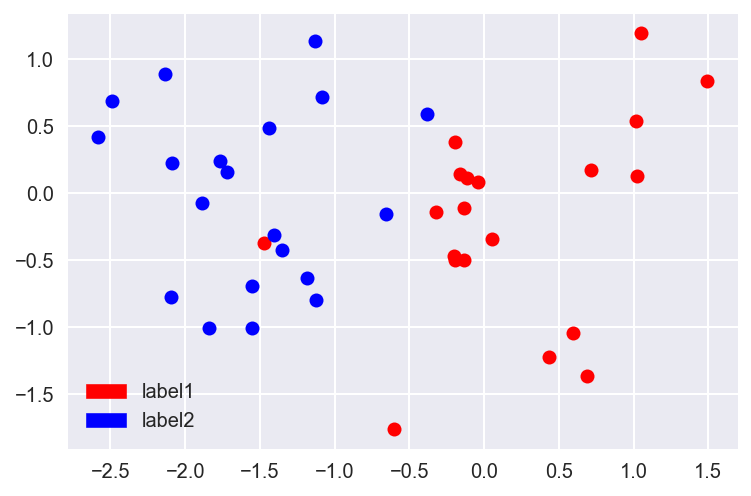

In [112]:
eigenv = np.column_stack((e1.T, e2.T))

#project data onto eigenvectors
proj1 = np.dot(matrix1, eigenv)
proj2 = np.dot(matrix2, eigenv)

newx1 = proj1[:, 0]
newy1 = proj1[:, 1]

newx2 = proj2[:, 0]
newy2 = proj2[:, 1]

#plot the projected points
plt.plot(newx1, newy1, "o", c= 'r')
plt.plot(newx2, newy2, "o", c= 'b')

red_patch = mpatches.Patch(color='red', label='label1')
blue_patch = mpatches.Patch(color='blue', label='label2')
plt.legend(handles=[red_patch, blue_patch])

plt.show()

Yes, PCA did make is easier to distinguish the two labels in two dimensions (where label 2 is clearly offset to the right of lablel 1). The variance of the points is clear in the x and y axes with the third dimension gone.

# Problem 2: Low Rank Approximation of Mona Lisa
1. Load the Mona Lisa image (in grayscale) and treat it as a matrix M. Perform a singular value
decomposition on this matrix using linalg.svd. You can perform a low-rank approximation
by zeroing out singular values and keeping only the top k. Show the best rank k = 2, k = 5
and k = 10 approximation to Mona Lisa.

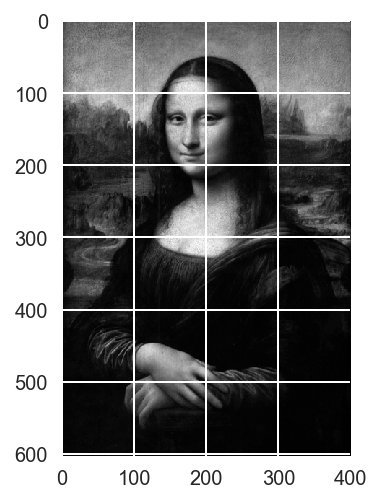

In [113]:
import scipy as sp
import matplotlib.pyplot as plt
from scipy.misc import imread
from scipy import linalg
import numpy as np
%matplotlib inline

monaLisa = imread("mona_lisa.png",flatten = True)
plt.imshow(monaLisa, cmap='gray')
plt.show()

In [114]:
U, S, V = np.linalg.svd(monaLisa, full_matrices = False)

In [115]:
def LRA(k):
    print "For rank %d" %(k)
    
    #resize U, S, V by the rank
    Ut = U[:, :k]
    St = S[:k]
    Vt = V[:k, :]
    
    #calculate low-rank approximation 
    At = Ut.dot(np.diag(St).dot(Vt))
    plt.imshow(At, cmap='gray')
    
    #calculate number of bits needed
    n = Ut.shape[0]
    p = Vt.shape[1]
    bits = 16 * ( k * (n + p + 1))
    print "Number of bits needed is %d" %(bits)

For rank 2
Number of bits needed is 32128


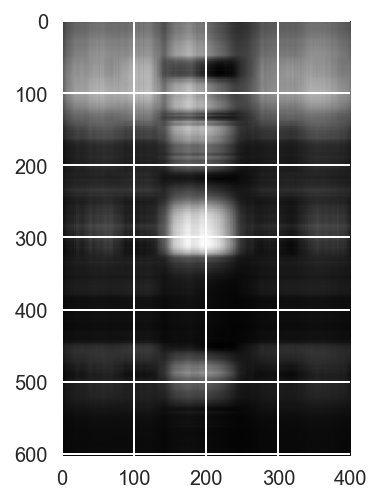

In [116]:
LRA(2)


For rank 5
Number of bits needed is 80320


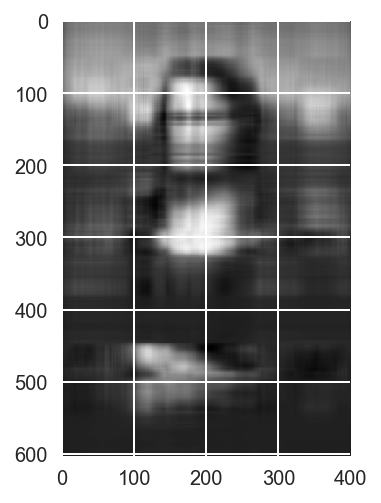

In [117]:
LRA(5)

For rank 10
Number of bits needed is 160640


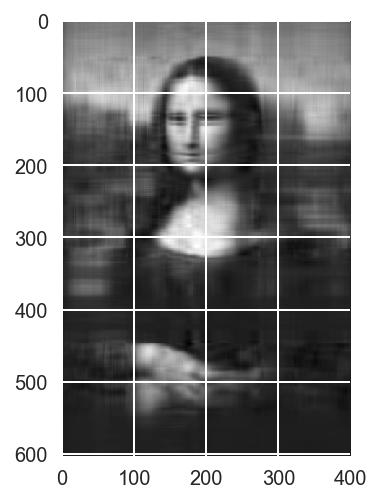

In [118]:
LRA(10)

# Problem 3: Using Low Rank Structure for Corrupted Entries
Download files CorrMat1.csv and CorrMat3.csv from Canvas. These are each 100 by 100 ma-
trices. Look at the data and find which entries are corrupted. Then try to correct these corrupted
entries. Explain your approach.

## 3.1 Correcting CorrMat1 entries

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [120]:
#read in csv
corrdata1 = pd.read_csv("CorrMat1.csv", header=None)
corrdata3 = pd.read_csv("CorrMat3.csv", header=None)

#### Using Sklearn PCA:

We are using PCA to reduce the dimensionality of the matrix to simply 2 dimensions to see if there are any outliers.

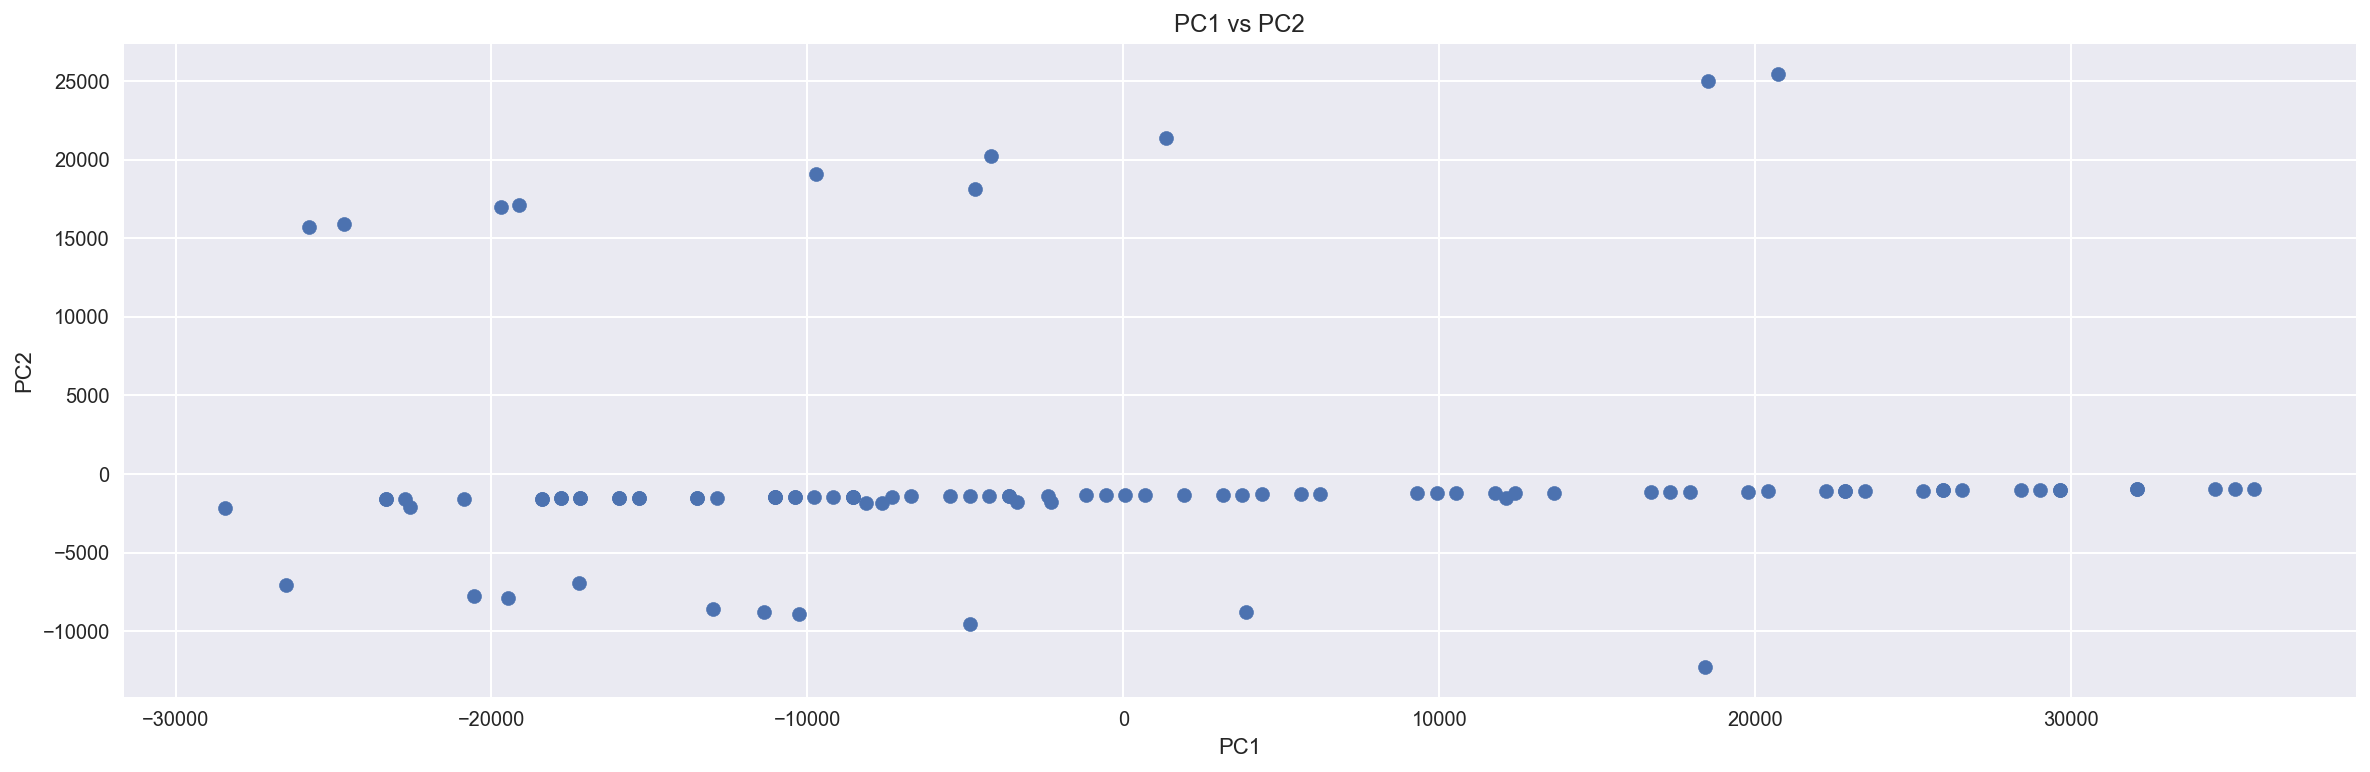

In [121]:
from sklearn.decomposition import PCA
pca = PCA( n_components = 2) 
X2D = pca.fit_transform( corrdata1)

#plot data
plt.figure(figsize=(20,6))
plt.scatter(X2D[:,0],X2D[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2')
plt.show()

We recognize that there are values not on the main blue line. Those are our corrupted data. We will find these values and bring them closer to the mean.

This is accomplished by finding the best fit line of the values that are "non corrupt"

Then map corrupt data points to that line.

(-5000, 5000)

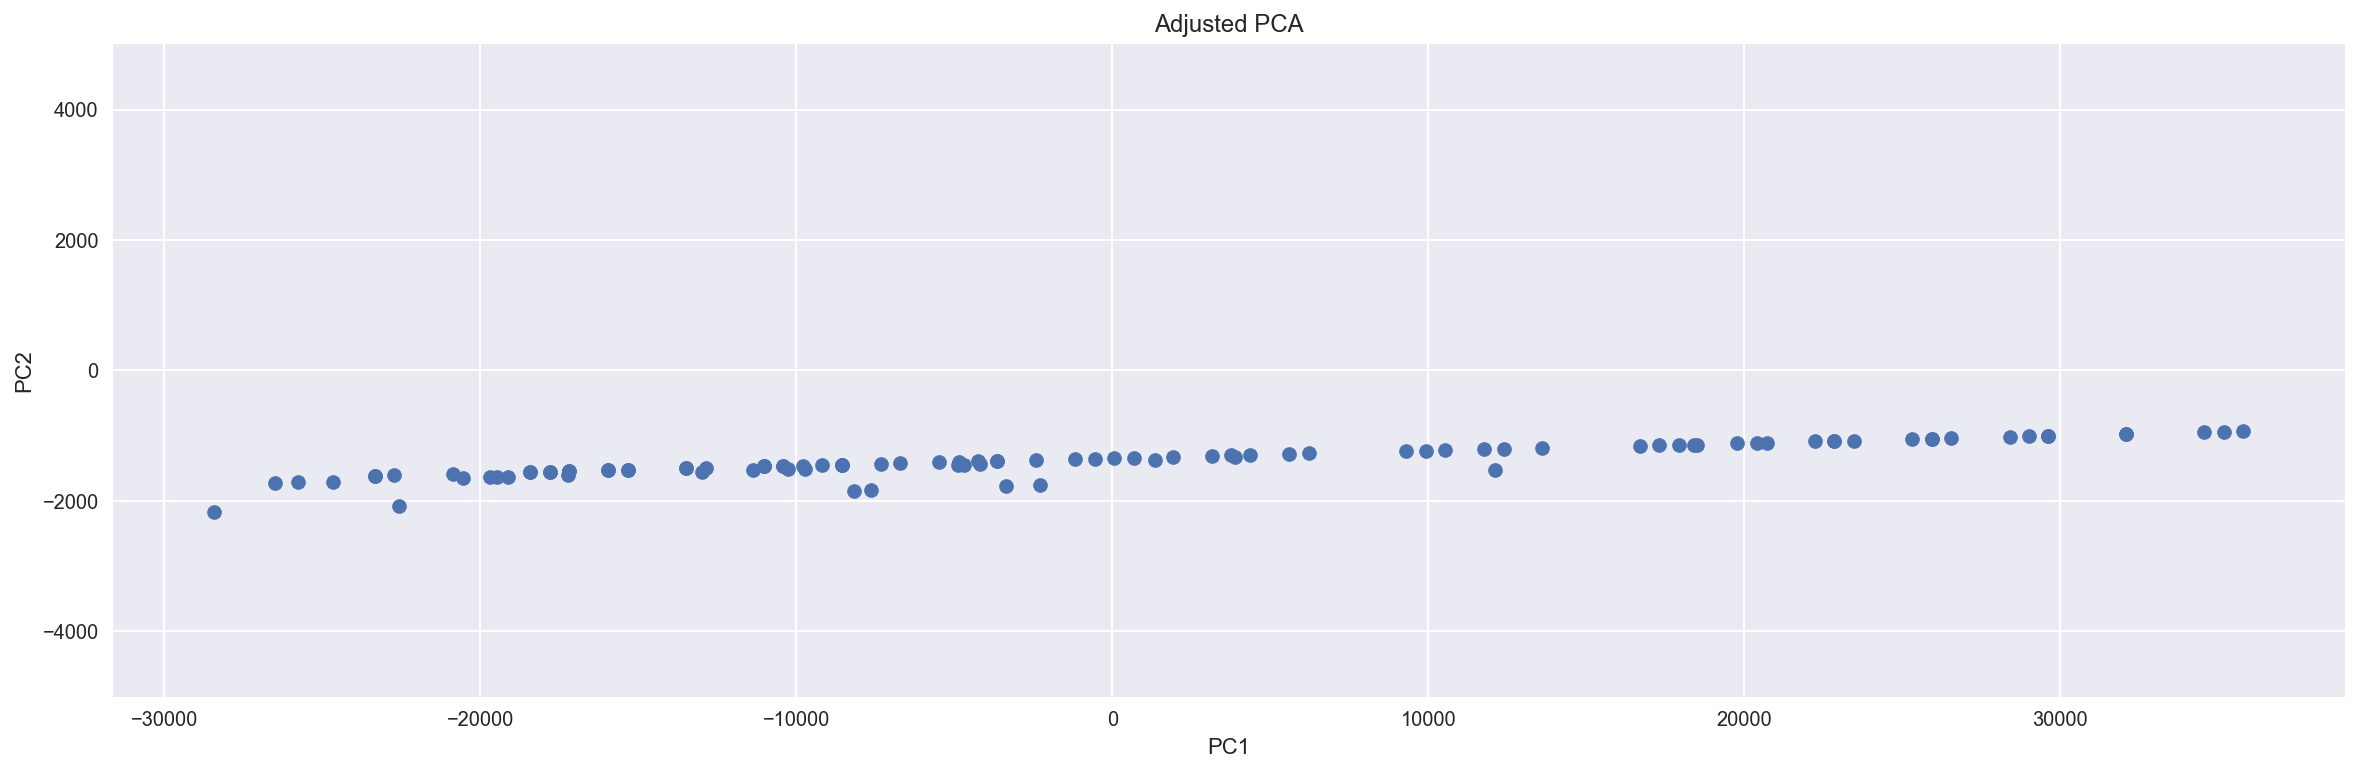

In [122]:
#Finding the best fit line of the good data set
PC1 = X2D[:,0];
PC2 = X2D[:,1];
goodX = []
goodY = []
for i in range(len(PC2)):
    if(PC2[i] > -5000 and PC2[i] < 10000):
            goodX.append(PC1[i])
            goodY.append(PC2[i])

#use best fit line for good data
fit = np.polyfit(goodX, goodY, 1)


#bring outliers closer to mean
newX =[]
newY = []
for i in range(len(PC2)):
    if(PC2[i] < -5000 or PC2[i] > 10000):
            newY.append(PC1[i]*fit[0] + fit[1])
    else:
            newY.append(PC2[i])

#retransformed PCA
plt.figure(figsize=(20,6))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Adjusted PCA')
plt.scatter(X2D[:,0],newY)
plt.ylim(-5000,5000)

Here, the below data points have been normalized and are less corrupt. Much better!

Now, we can atttempt to transform the PCA dataset back and compare with our original dataset

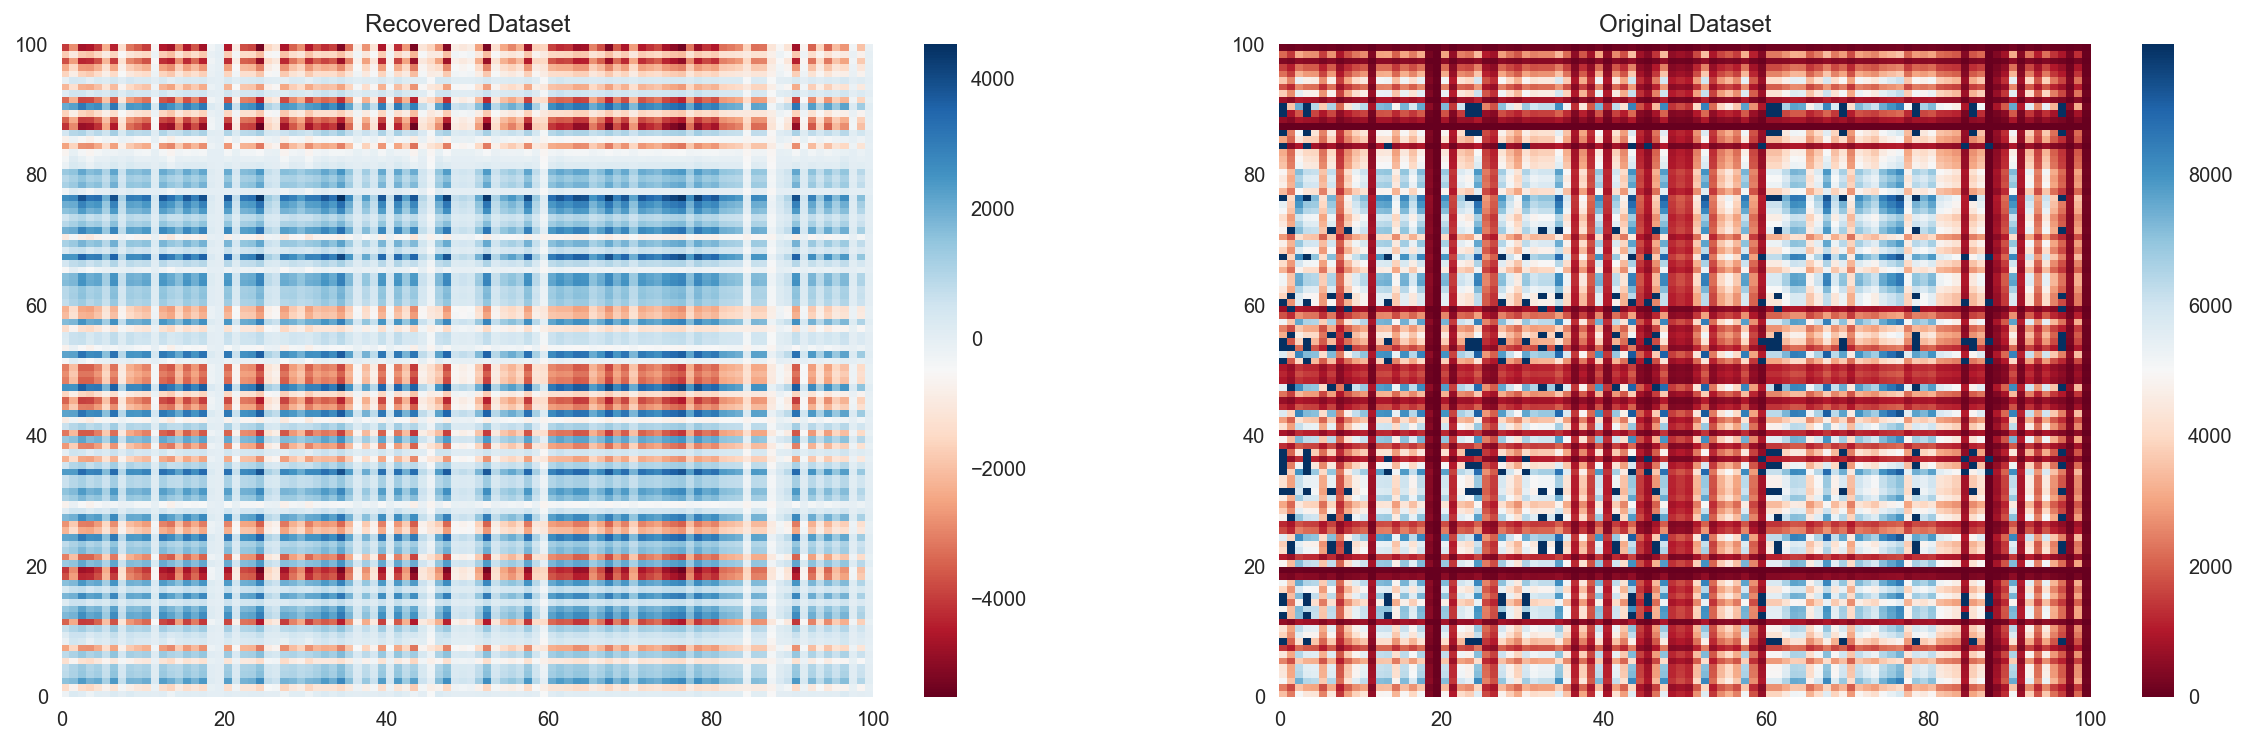

In [123]:
#retransform back to original dataset
mu = np.mean(corrdata1, axis = 0)
newX2D = np.column_stack((PC1,newY))

corrData1Xhat = np.dot(newX2D, pca.components_[:2,:])

plt.figure(figsize=(20,6))
#plot data set recovered from the newPCA 
plt.subplot(121)
plt.title("Recovered Dataset")
plt.pcolor(corrData1Xhat,cmap='RdBu')
plt.colorbar()

#plot original data set
plt.subplot(122)
plt.title("Original Dataset")
plt.pcolor(corrdata1,cmap='RdBu')
plt.colorbar()

We can attempt to transform our PCA back into our original data set. As we see, the gradients of values are still similiar, however, there is less noise. 
Our recovered dataset is stored in corrData1Xhat.

#### Recap:

First found PCA with n=2 dimensions.
Found and adjust outliers in the 2nd dimension
Transformed data set back into the original high space dimension

## 3.2 Correcting CorrMat3 entries

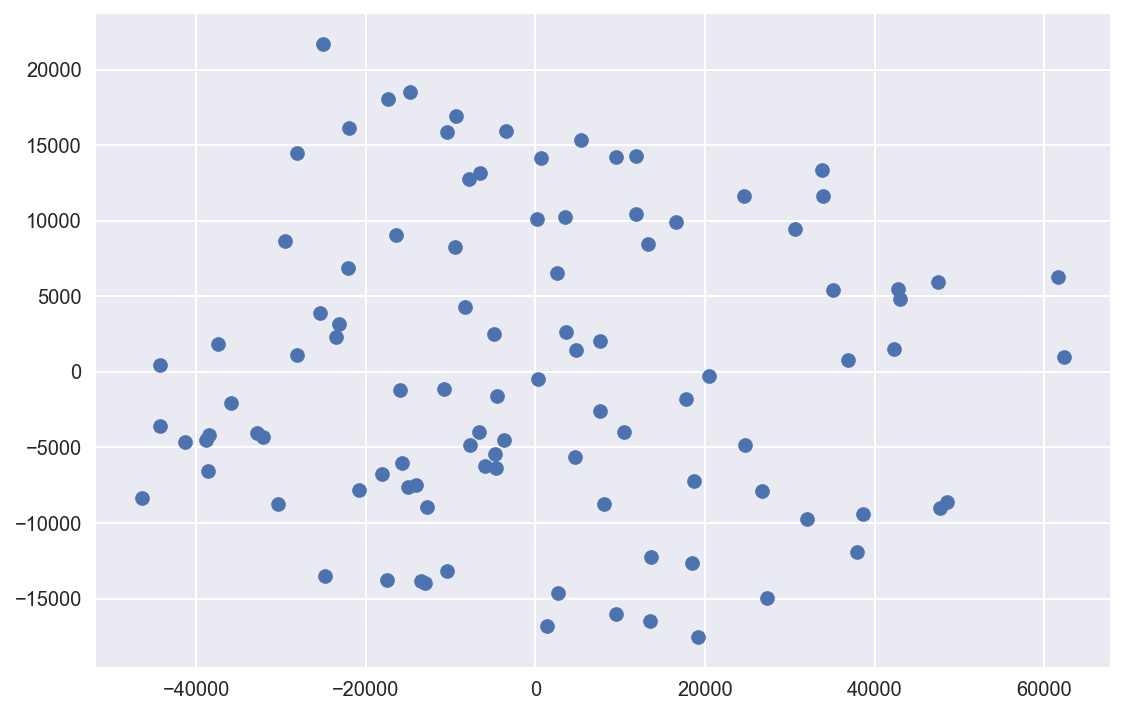

In [124]:
from sklearn.decomposition import PCA
pca = PCA( n_components = 2) 
X2D = pca.fit_transform(corrdata3)

#plot PCA
plt.figure(figsize=(20,6))
plt.subplot(121)
plt.scatter(X2D[:,0],X2D[:,1])
plt.show()

### Observation:
We intitially tried doing PCA of several dimensions and recognized that this was perhaps the wrong approach.
After some more analysis, we recognized this trend from the console output:

$$mat[i][j] = mat[j][i]$$

In [125]:
print(corrdata3)

         0        1        2        3        4        5        6       7   \
0   11961.0  13479.0   9106.0   7953.0  11922.0   8909.0  14849.0  4983.0   
1   13479.0  16106.0   8784.0   7687.0  12888.0  10086.0  16676.0  5602.0   
2    9106.0   8784.0   9324.0   7966.0   9970.0   6540.0  11322.0  3792.0   
3    7953.0   7687.0   7966.0   9485.0   8496.0   8657.0  11211.0  3719.0   
4   11922.0  12888.0   9970.0   8496.0  12225.0   8630.0  14735.0  4944.0   
5    8909.0  10086.0   6540.0   8657.0   8630.0   9870.0  12510.0  4158.0   
6   14849.0  16676.0  11322.0  11211.0  14735.0  12510.0  19091.0  6388.0   
7    4983.0   5602.0   3792.0   3719.0   4944.0   4158.0   6388.0  2138.0   
8    6127.0   6238.0   5624.0   6927.0   6352.0   6754.0   8648.0  2870.0   
9   14455.0  16520.0  10580.0  10175.0  14200.0  11800.0  18390.0  6160.0   
10  13731.0  15284.0  10762.0   9349.0  13803.0  10166.0  17035.0  5716.0   
11   2838.0   3342.0   1928.0   1698.0   2742.0   2134.0   3520.0  1182.0   

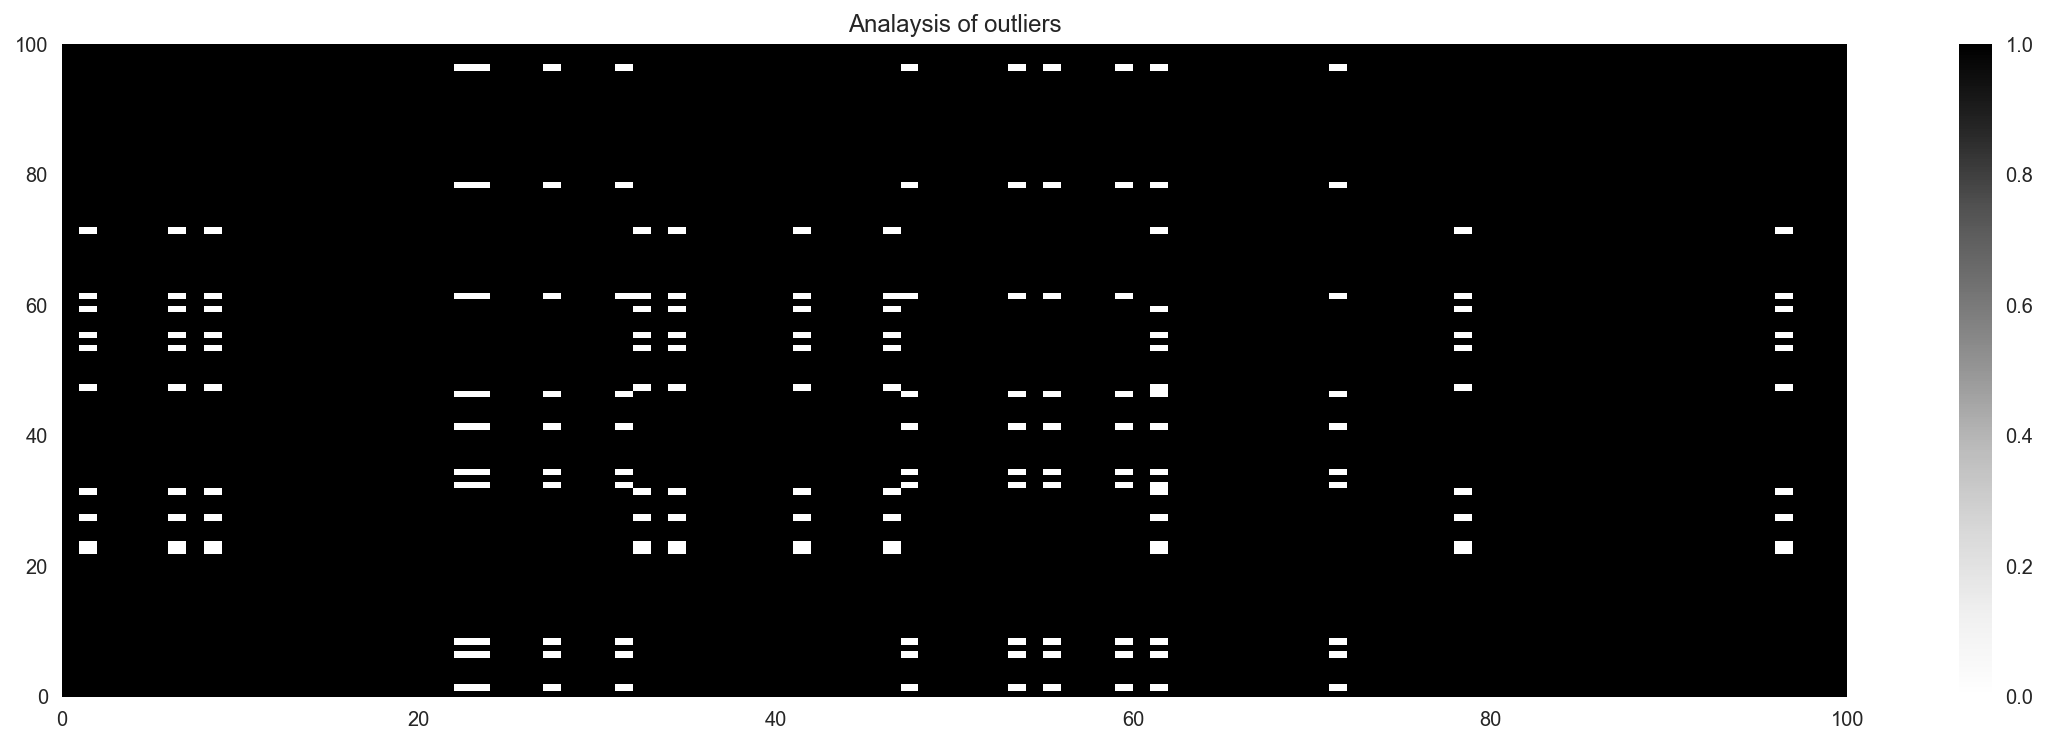

In [126]:
#visualizing data
def viewTrend(corrdata):
    numCols = len(corrdata.columns)
    numRows = len(corrdata.index)
    newMat = [['foo' for i in range(numCols)] for j in range(numRows)]
    for i in range(numCols):
        for j in range(numRows):
            if(corrdata[i][j] == corrdata[j][i]):
                newMat[i][j] = 1
                newMat[j][i] = 1
            else:
                newMat[i][j] =0
                newMat[i][j] = 0
    return newMat


newMat = viewTrend(corrdata3)
plt.figure(figsize=(20,6))
plt.title('Analaysis of outliers')
plt.pcolor(newMat)
plt.colorbar()

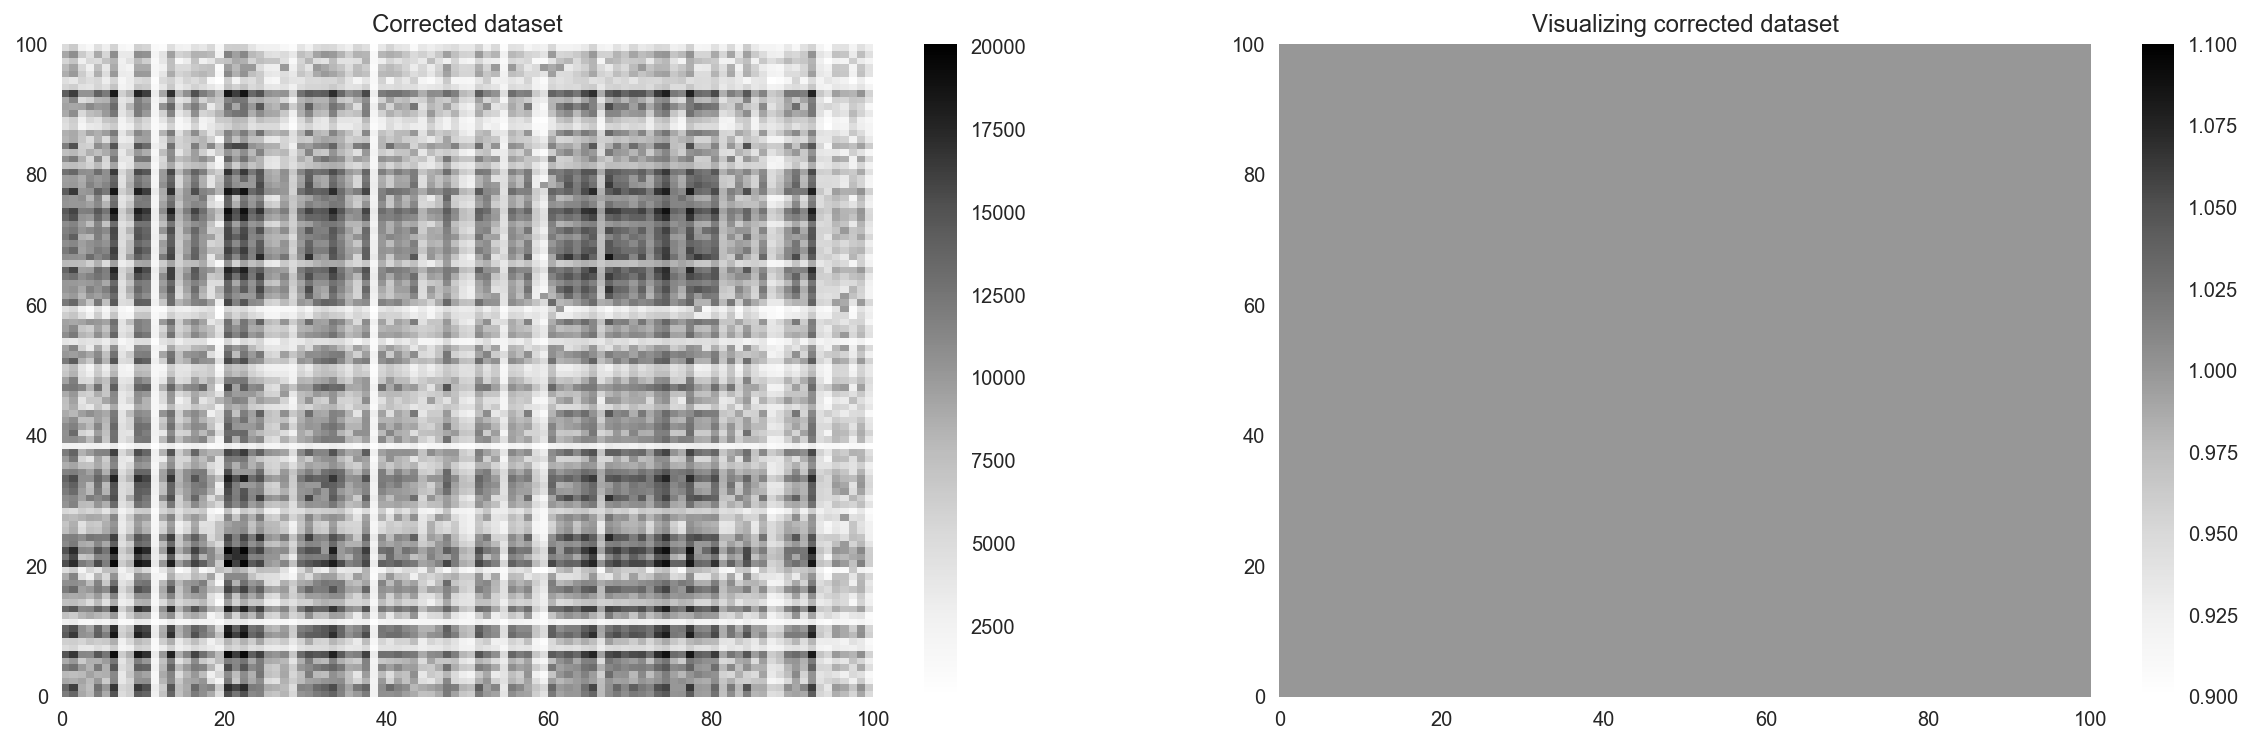

In [127]:
#We will attempt to correct all non yellow squares:

numCols = len(corrdata3.columns)
numRows = len(corrdata3.index)
newMat = [['foo' for i in range(numCols)] for j in range(numRows)]
for i in range(numCols):
    for j in range(numRows):
        if(corrdata3[i][j] == corrdata3[j][i]):
            newMat[i][j],newMat[i][j] = corrdata3[i][j],corrdata3[j][i]
            
        else:
            newMat[i][j],newMat[j][i] = corrdata3[i][j],corrdata3[i][j]
            
#Plot comrrected dataset
plt.figure(figsize=(20,6))
plt.subplot(121)
plt.title('Corrected dataset')
plt.pcolor(newMat,cmap='RdBu')
plt.colorbar() 


#Plot the trend we see in the corrected dataset
correctedMat = viewTrend(pd.DataFrame(newMat))
plt.subplot(122)
plt.title('Visualizing corrected dataset')
plt.pcolor(correctedMat,cmap='RdBu')
plt.colorbar() 

From the above chart on the right, we have recognized that all the data is now uniform following the trend:
$$mat[i][j] = mat[j][i]$$

# Problem 3: Getting more into Kaggle.
1. Goal: Get the best score you can in the Housing prices competition. https://www.kaggle.com/c/houseprices-advanced-regression-techniques/

2. Train a ridge regression and a lasso regression model. Optimize the alphas using cross validation.
What is the best scrore you can get from a single ridge regression model and from a
single lasso model?

3. Plot the l0 norm (number of nonzeros) of the coeficients that lasso produces as you vary
alpha.

4. Add the outputs of your models as features and train a ridge regression on all the features
plus the model outputs (This is called Ensembling and Stacking). Be careful not to overfit.
What score can you get?

5. Install XGBoost (Gradient Boosting) and train a gradient boosting regression. What score
can you get just from a single XGB? (you will need to optimize over its parameters).

6. Do your best to win. Try feature engineering and stacking many models. You are allowed to
use any public tool in python. No nonpython tools allowed.

7. Read (and post) in the Kaggle forums. Include in your report if you find something in the
forums you like, or if you made a post or code, especially if other Kagglers used it afterwards.

8. Be sure you do not violate the rules of Kaggle! No sharing of code or data outside the Kaggle
forums. Every student should have their own individual Kaggle account and teams can be
formed in the Kaggle submissions with your Lab partner.

9. You will be graded based on your public score (include that in your report) and also on the
creativity of your solution. In your report (that you will submit as a pdf file), explain
what worked and what did not work. Many creative things will not work, but you will get
partial credit for developing them. We will invite teams with interesting solutions to present
them in class.

## Answers

## Observations and Experiences on Kaggle Experience: 

### Kernels Referenced:
Stacking: https://www.kaggle.com/jimthompson/ensemble-model-stacked-model-example/comments

Basic Feature Engineering: https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset/comments

Regularized Linear Model: https://www.kaggle.com/apapiu/regularized-linear-models

PCA and Regression: https://www.kaggle.com/miguelangelnieto/pca-and-regression/comments#latest-184996

### Feature Engineering
Feature Engineering and Data Cleaning code was heavily leveraged by code from: Alexandru Papiu https://www.kaggle.com/apapiu/regularized-linear-models
The following were the steps taken to clean the data set:
1. Transform skewed numeric features by taking log(feauture +1) to make features more normal
2. Create Dummy variables for the categorical featurues
3. Replace number missing values (NaN's) with the mean of their respective columns

### Simple Base Models
We first began our analysis on simple base models that we might want to use for feature stacking.
We scored the following values using their rmse:

* Ridge Regression: We optimized alphas on ridge regression using cross validation. Running Ridge alone gave us an RMSE of : 0.1273

* Lasso Regression: Running Laso alone gave us an RMSE of: 0.1231

* Huber Regression: Huber Regression gave us an RMSE of: 0.222

* Gradient Boosting: XGBoost gave us an RMSE of 0.127

* ExtraTreeRegressor: RMSE of 0.145

* RandomForest: RMSE of 0.1318

Surprisingly, Huber Regression did the worst.
We decided to stack all the above models (except for Huber) due to its low rmse score.

### Stacking and Ensembling
Our stacked model consisted of stacking Ridge, Lasso, ExtraTreeRegressor, and RandomFoerst
Then, we decided to run Ridge Regression on the new featured set followed by XGBoost, these were the following results:

* Ridge on stacked model gave us RMSE of 0.124
* XGBoost on stacked model gave us RMSE of 0.123

As we see, XGBoost, did slightly better. We decided to progress with this route.

### PCA and Regression
* We did a brief test of PCA on Ridge Regression with rank 36 to see if this was a viable route in improving our rmse score. It did not. We moved away from this model.

### Combining models
Using ideas we got from Papiu's post, we decided to weigh two models and combine their predictions.
We deicded to thus combine a stacked model with lasso regression while modifying its weights: 

* In Lab 3, a model of 0.7 * Lasso + 0.3*XGBoost gave us an rmse of 0.1204

Here are the adjusted weights we attempted for this lab:

* 0.7 * Lasso + 0.3*XGBoostonEnsemble gave us an rmse of 0.1191

* 0.3 * Lasso + 0.7*XGBoostonEnsemble gave us an rmse of 0.1198

* 0.5 * Lasso + 0.5*XGBoostonEnsemble gave us an rmse of 0.118 (this was our best score)


### Next Steps and Learning

The takeaways are as follows: 

1. Creating more features leads to a better public scoring on the leaderboard (however, we may be overfitting)

2. Combining the weights of 2 models have huge impacts on the rmse scorings

3. Feauture Engineering is important - perhaps a more robust data cleaning and featureu engineering would result in a better data set

![](http://i.markdownnotes.com/image_Zm72g0E.png)

## 3.2. Train a ridge regression and a lasso regression model. Optimize the alphas using cross validation.
 What is the best scrore you can get from a single ridge regression model and from a single lasso model?

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [6]:
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")

In [7]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})

In [8]:
#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

all_data.dtypes.head()

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

#computes skewness of data greater than 0.75
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [9]:
#assigns categorical values
all_data = pd.get_dummies(all_data)

In [10]:
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

In [11]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [12]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, Lasso
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

### Ridge

The main tuning parameter for the Ridge model is alpha - a regularization parameter that measures how flexible our model is. The higher the regularization the less prone our model will be to overfit. However it will also lose flexibility and might not capture all of the signal in the data.

In [16]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

In [17]:
cv_ridge = pd.Series(cv_ridge, index = alphas)

In [18]:
regr_cv = RidgeCV(alphas = alphas)
model_cv = regr_cv.fit(X_train,y)
print "The best alpha for Ridge is: " + str(model_cv.alpha_)
print "The minimum RMSE for Ridge is: " + str(cv_ridge.min())

The best alpha for Ridge is: 10.0
The minimum RMSE for Ridge is: 0.127337346687


### Lasso

In [19]:
model_lasso = LassoCV()

In [20]:
alphas = [1, 0.1, 0.001, 0.0005]
model_lasso = LassoCV(alphas = alphas).fit(X_train, y)
print "The best alpha for Lasso is: " + str(model_lasso.alpha_)
print 'The minimum RMSE for Lasso is: ' + str(rmse_cv(model_lasso).mean())

The best alpha for Lasso is: 0.0005
The minimum RMSE for Lasso is: 0.12314421091


## 3.3 Plot the l0 norm (number of nonzeros) of the coeficients that lasso produces as you vary alpha.

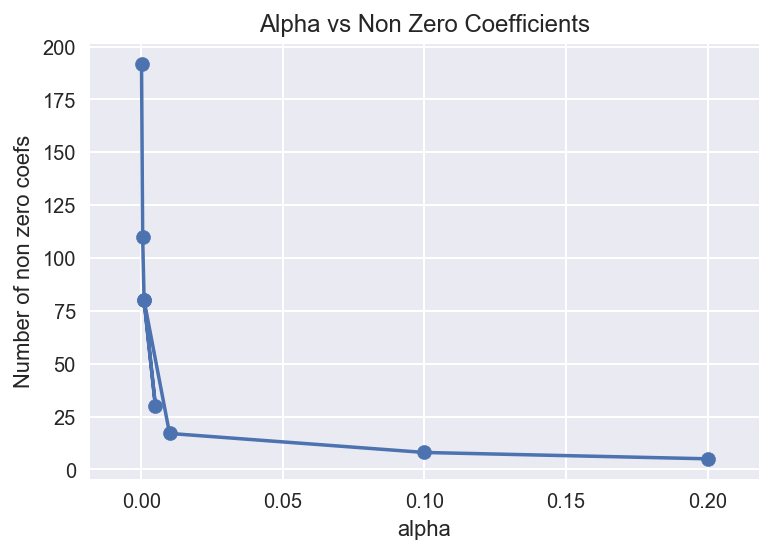

In [25]:
alphas = [0.2, 0.1, 0.01, 0.001, 0.005, 0.001, 0.0005, 0.0001]
number_nonzeros = []

for alpha in alphas:
    model_lasso = Lasso(alpha = alpha).fit(X_train,y)
    coefs = model_lasso.coef_
    count =0
    for coef in coefs:
        if coef != 0:
            count +=1
    number_nonzeros.append(count)

plt.scatter(alphas,number_nonzeros)
plt.plot(alphas, number_nonzeros)
plt.xlabel("alpha")
plt.ylabel("Number of non zero coefs")
plt.title("Alpha vs Non Zero Coefficients")
plt.show()

## 3.4 Add the outputs of your models as features and train a ridge regression on all the features plus the model outputs (This is called Ensembling and Stacking). Be careful not to overfit. What score can you get?

With this approach we find the predictions of the ridge and lasso models and append them onto the data set. Then we run ridge regression over the aggregated data to see if we can get a better score.

In [26]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,0,0,0,1,0,0,0,0,1,0


In [27]:
model_cv.predict(X_train)

array([ 12.24391057,  12.17892855,  12.28836396, ...,  12.43402032,
        11.85310649,  11.85860895])

In [28]:
# find predictions from each model
ridge_features = model_cv.predict(X_train)
lasso_features = model_lasso.predict(X_train)

#append features
X_train['Ridge'] = ridge_features
X_train['Lasso'] = lasso_features

In [29]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
ensemble_ridgecv = RidgeCV(alphas = alphas)
ensemble_cv = ensemble_ridgecv.fit(X_train,y)
print 'The minimum RMSE for Ensemble using Ridge is: ' + str(rmse_cv(ensemble_cv).mean())

The minimum RMSE for Ensemble using Ridge is: 0.122746545348


This approach yields an RMSE of 0.1227 which is better than just the singular approaches of ridge and lasso, demonstrating the benefits of expanding the feature set by stacking models.

## 3.5 Install XGBoost (Gradient Boosting) and train a gradient boosting regression. What score can you get just from a single XGB? (you will need to optimize over its parameters).

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [30]:
import xgboost as xgb

In [31]:
#reassign X_train:

X_train = all_data[:train.shape[0]]
dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

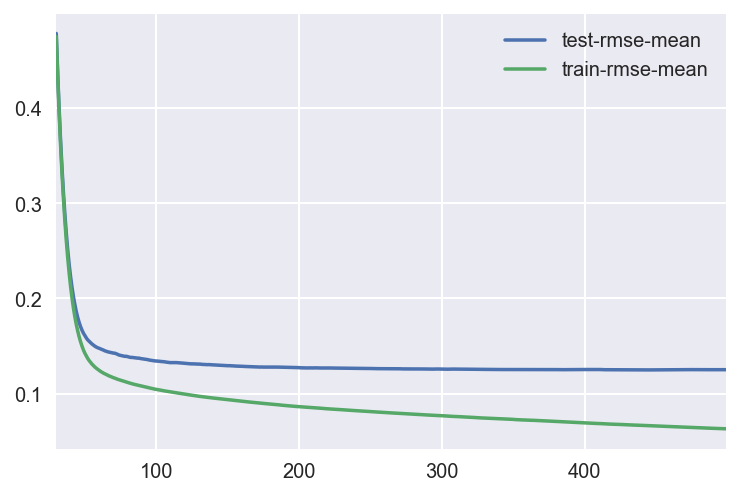

In [32]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [33]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=360, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [34]:
xgb_preds = np.expm1(model_xgb.predict(X_test))
lasso_preds = np.expm1(model_lasso.predict(X_test))

In [35]:
print 'The minimum RMSE for XGBoost is: ' + str(rmse_cv(model_xgb).mean())

The minimum RMSE for XGBoost is: 0.124944757664


## Model Huber

In [113]:
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [114]:
parameters = {'alpha': [1000,100,10],
              'epsilon' : [1.2,1.25,1.50],
              'tol' : [1e-10]}
cv = KFold(n_splits=5,shuffle=True,random_state=45)
clf = linear_model.HuberRegressor()
r2 = make_scorer(r2_score)
grid_obj = GridSearchCV(clf, parameters, cv=cv,scoring=r2)
grid_fit = grid_obj.fit(X_train, y)
best_clf = grid_fit.best_estimator_ 
best_clf.fit(X_train,y)
predictions_huber = best_clf.predict(X_test)
predictions_huber = np.expm1(predictions_huber)

In [121]:
preds = 0.7*lasso_preds + 0.3*xgb_preds
solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv("huberstackingnonPCA.csv", index = False)

We then apply PCA to reduce the dimensionality of the data set; extracting the most important features to apply the Huber Regressor on this subset of data.

In [116]:
pca = PCA(n_components=36,whiten=True)
pca = pca.fit(all_data)
dataPCA = pca.transform(all_data)
X_trainPCA = all_data[:1460]
X_testPCA = all_data[1460:]
y = train.SalePrice

In [117]:
parameters = {'alpha': [1000,100,10],
              'epsilon' : [1.2,1.25,1.50],
              'tol' : [1e-10]}
cv = KFold(n_splits=5,shuffle=True,random_state=45)
clf = linear_model.HuberRegressor()
r2 = make_scorer(r2_score)
grid_obj = GridSearchCV(clf, parameters, cv=cv,scoring=r2)
grid_fit = grid_obj.fit(X_trainPCA, y)
best_clf = grid_fit.best_estimator_ 
best_clf.fit(X_trainPCA,y)
predictions_huber = best_clf.predict(X_testPCA)
predictions_huber = np.expm1(predictions_huber)

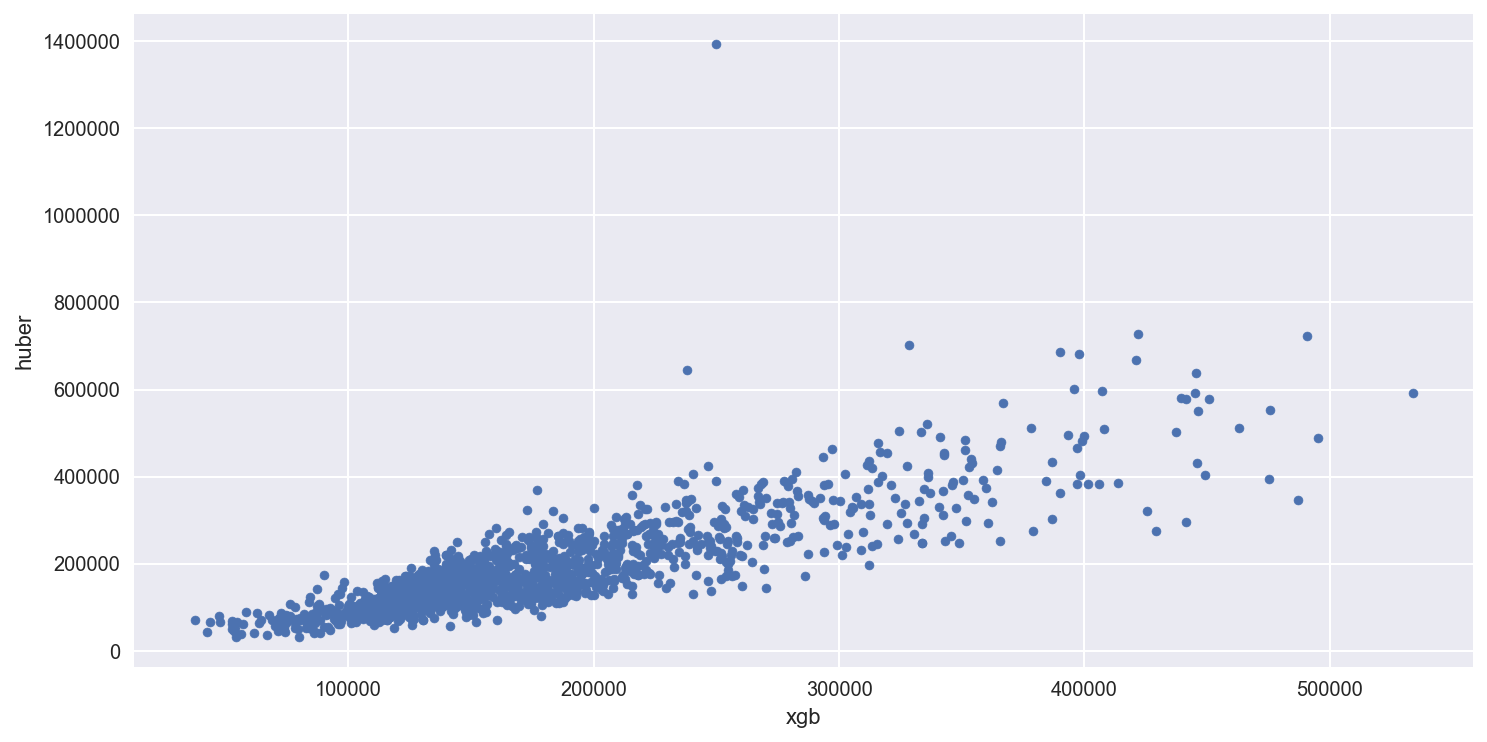

In [118]:
predictions = pd.DataFrame({"xgb":xgb_preds, "huber":predictions_huber})
predictions.plot(x = "xgb", y = "huber", kind = "scatter")

We stacked the XGBoost and PCA predictions and applied the Huber Model. The graph above demonstrates the predictions between the the Huber and XGBoost models.

In [123]:
preds = 0.7*lasso_preds + 0.3*xgb_preds
solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv("huberstacking.csv", index = False)

### Kaggle (Best) Attempt

In [36]:
# Stacking Starter based on Allstate Faron's Script
#https://www.kaggle.com/mmueller/allstate-claims-severity/stacking-starter/run/390867
# Preprocessing from Alexandru Papiu
#https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models

import pandas as pd
import numpy as np
from scipy.stats import skew
import xgboost as xgb
from sklearn.cross_validation import KFold
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, Lasso
from math import sqrt


TARGET = 'SalePrice'
NFOLDS = 5
SEED = 0
NROWS = None
SUBMISSION_FILE = 'input/sample_submission.csv'


## Load the data ##
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")

ntrain = train.shape[0]
ntest = test.shape[0]

## Preprocessing ##

y_train = np.log(train[TARGET]+1)


train.drop([TARGET], axis=1, inplace=True)


all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))


#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

all_data = pd.get_dummies(all_data)

#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

#creating matrices for sklearn:

x_train = np.array(all_data[:train.shape[0]])
x_test = np.array(all_data[train.shape[0]:])

kf = KFold(ntrain, n_folds=NFOLDS, shuffle=True, random_state=SEED)


class SklearnWrapper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)


class XgbWrapper(object):
    def __init__(self, seed=0, params=None):
        self.param = params
        self.param['seed'] = seed
        self.nrounds = params.pop('nrounds', 250)

    def train(self, x_train, y_train):
        dtrain = xgb.DMatrix(x_train, label=y_train)
        self.gbdt = xgb.train(self.param, dtrain, self.nrounds)

    def predict(self, x):
        return self.gbdt.predict(xgb.DMatrix(x))


def get_oof(clf):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)


et_params = {
    'n_jobs': 16,
    'n_estimators': 100,
    'max_features': 0.5,
    'max_depth': 12,
    'min_samples_leaf': 2,
}

rf_params = {
    'n_jobs': 16,
    'n_estimators': 100,
    'max_features': 0.2,
    'max_depth': 12,
    'min_samples_leaf': 2,
}

xgb_params = {
    'seed': 0,
    'colsample_bytree': 0.7,
    'silent': 1,
    'subsample': 0.7,
    'learning_rate': 0.075,
    'objective': 'reg:linear',
    'max_depth': 4,
    'num_parallel_tree': 1,
    'min_child_weight': 1,
    'eval_metric': 'rmse',
    'nrounds': 500
}



rd_params={
    'alpha': 10
}


ls_params={
    'alpha': 0.005
}


xg = XgbWrapper(seed=SEED, params=xgb_params)
et = SklearnWrapper(clf=ExtraTreesRegressor, seed=SEED, params=et_params)
rf = SklearnWrapper(clf=RandomForestRegressor, seed=SEED, params=rf_params)
rd = SklearnWrapper(clf=Ridge, seed=SEED, params=rd_params)
ls = SklearnWrapper(clf=Lasso, seed=SEED, params=ls_params)

xg_oof_train, xg_oof_test = get_oof(xg)
et_oof_train, et_oof_test = get_oof(et)
rf_oof_train, rf_oof_test = get_oof(rf)
rd_oof_train, rd_oof_test = get_oof(rd)
ls_oof_train, ls_oof_test = get_oof(ls)

print("XG-CV: {}".format(sqrt(mean_squared_error(y_train, xg_oof_train))))
print("ET-CV: {}".format(sqrt(mean_squared_error(y_train, et_oof_train))))
print("RF-CV: {}".format(sqrt(mean_squared_error(y_train, rf_oof_train))))
print("RD-CV: {}".format(sqrt(mean_squared_error(y_train, rd_oof_train))))
print("LS-CV: {}".format(sqrt(mean_squared_error(y_train, ls_oof_train))))


x_train = np.concatenate((xg_oof_train, et_oof_train, rf_oof_train, rd_oof_train, ls_oof_train), axis=1)
x_test = np.concatenate((xg_oof_test, et_oof_test, rf_oof_test, rd_oof_test, ls_oof_test), axis=1)

print("{},{}".format(x_train.shape, x_test.shape))

dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test)

xgb_params = {
    'seed': 0,
    'colsample_bytree': 0.8,
    'silent': 1,
    'subsample': 0.6,
    'learning_rate': 0.01,
    'objective': 'reg:linear',
    'max_depth': 1,
    'num_parallel_tree': 1,
    'min_child_weight': 1,
    'eval_metric': 'rmse',
}

res = xgb.cv(xgb_params, dtrain, num_boost_round=1000, nfold=4, seed=SEED, stratified=False,
             early_stopping_rounds=25, verbose_eval=10, show_stdv=True)

best_nrounds = res.shape[0] - 1
cv_mean = res.iloc[-1, 0]
cv_std = res.iloc[-1, 1]

print('Ensemble-CV: {0}+{1}'.format(cv_mean, cv_std))

gbdt = xgb.train(xgb_params, dtrain, best_nrounds)

#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]

model_lasso = LassoCV()
alphas = [1, 0.1, 0.001, 0.0005]
model_lasso = LassoCV(alphas = alphas).fit(X_train, y_train)
lasso_preds = np.expm1(model_lasso.predict(X_test))

submission = pd.read_csv(SUBMISSION_FILE)
submission.iloc[:, 1] = gbdt.predict(dtest)
saleprice = np.exp(submission['SalePrice'])-1


preds = 0.5*lasso_preds + 0.5*saleprice


submission['SalePrice'] = preds
submission.to_csv('xgstackerweightedhalf.csv', index=None)


XG-CV: 0.123236765829
ET-CV: 0.145292593988
RF-CV: 0.142165116712
RD-CV: 0.13183915747
LS-CV: 0.143216331902
(1460L, 5L),(1459L, 5L)
[0]	train-rmse:11.4159+0.00727902	test-rmse:11.4159+0.0221769
[10]	train-rmse:10.3275+0.00647517	test-rmse:10.3275+0.0230641
[20]	train-rmse:9.3429+0.00554988	test-rmse:9.34287+0.024078
[30]	train-rmse:8.45265+0.00513113	test-rmse:8.45262+0.0246051
[40]	train-rmse:7.64737+0.00467193	test-rmse:7.6474+0.0250131
[50]	train-rmse:6.91896+0.00423594	test-rmse:6.91914+0.024779
[60]	train-rmse:6.25991+0.00382696	test-rmse:6.26029+0.0242191
[70]	train-rmse:5.66403+0.00333421	test-rmse:5.66451+0.0240386
[80]	train-rmse:5.12525+0.00310455	test-rmse:5.12556+0.0236071
[90]	train-rmse:4.63784+0.00261148	test-rmse:4.63819+0.0235351
[100]	train-rmse:4.1968+0.00222746	test-rmse:4.19728+0.0232484
[110]	train-rmse:3.79794+0.00205526	test-rmse:3.79848+0.0227223
[120]	train-rmse:3.43715+0.00183187	test-rmse:3.43794+0.0225482
[130]	train-rmse:3.11085+0.00183727	test-rmse:3.111

![](http://i.markdownnotes.com/image_Zm72g0E.png)